1.Khai báo thư viện


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tabulate import tabulate
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


2.Đọc dữ liệu 

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/content/datasetnhom15.xlsx',sheet_name='Sheet1')
df.head()


,STT,HoTen,GioiTinh,Tuoi,BC_Ngoai_Pham,Tien_An,Dong_Co,BC_Pham_Toi,Ket_Luan
0,1.0,Huỳnh Thị Trúc Ly,Nữ,Trên 50,Có,Không,Có,Không Có,Không
1,2.0,Vũ Hoàng Yến,Nữ,Từ 18-50,Không,Có,Có,Không Có,Không
2,3.0,Nguyễn Thị Thanh Kiều,Nữ,Từ 18-50,Không Chắc,Có,Có,Không Rõ Ràng,Nghi Phạm
3,4.0,Lê Hoa,Nữ,Trên 50,Có,Có,Không,Không Có,Không
4,5.0,Nguyễn Tiến Hải,Nam,Từ 18-50,Không,Không,Không,Không Rõ Ràng,Nghi Phạm


3. Mô tả dữ liệu 

In [ ]:
# Xem 5 dòng dữ liệu cuối cùng

df.tail()

,STT,HoTen,GioiTinh,Tuoi,BC_Ngoai_Pham,Tien_An,Dong_Co,BC_Pham_Toi,Ket_Luan
560,561.0,Nguyễn Quang Việt,Nam,Trên 50,Có,Không,Không,Không Rõ Ràng,Nghi Phạm
561,562.0,Trương Đinh Tuấn,Nam,Trên 50,Không Chắc,Không,Không,Đáng Tin Cậy,Nghi Phạm
562,563.0,TRẦN XUÂN THỊNH,Nam,Từ 18-50,Không Chắc,Không,Không,Đáng Tin Cậy,Nghi Phạm
563,564.0,Trần Thị Thu,Nữ,Trên 50,Không,Có,Không,Không Rõ Ràng,Nghi Phạm
564,565.0,Tô Văn Thuận,Nam,Từ 18-50,Không,Không,Có,Không Có,Không


In [ ]:
# Số lượng mẫu và số thuộc tính
print(df.shape)
# Số lượng mẫu
print(df.shape[0])
# số lượng thuộc tính
print(df.shape[1])

(565, 9)
565
9


In [ ]:
# Thống kê các giá trị định lượng
df.describe()

,STT
count,565.000000
mean,283.000000
std,163.245725
min,1.000000
25%,142.000000
50%,283.000000
75%,424.000000
max,565.000000


In [ ]:
# Hiển thị kiểu dữ liệu của các thuộc tính
df.dtypes

STT              float64
HoTen             object
GioiTinh          object
Tuoi              object
BC_Ngoai_Pham     object
Tien_An           object
Dong_Co           object
BC_Pham_Toi       object
Ket_Luan          object
dtype: object

In [ ]:
# Các giá trị thống kê
df.isnull().sum()

STT              0
HoTen            0
GioiTinh         0
Tuoi             0
BC_Ngoai_Pham    0
Tien_An          1
Dong_Co          0
BC_Pham_Toi      0
Ket_Luan         1
dtype: int64

4. Tiền xử lý dữ liệu 

In [ ]:
# Đổi dữ liệu từ dạng định danh (object) về dạng số
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["HoTen"] = lb_make.fit_transform(df["HoTen"])
df["GioiTinh"] = lb_make.fit_transform(df["GioiTinh"])
df["Tuoi"] = lb_make.fit_transform(df["Tuoi"])
df["BC_Ngoai_Pham"] = lb_make.fit_transform(df["BC_Ngoai_Pham"])
df["Tien_An"] = lb_make.fit_transform(df["Tien_An"])
df["Dong_Co"] = lb_make.fit_transform(df["Dong_Co"])
df["BC_Pham_Toi"] = lb_make.fit_transform(df["BC_Pham_Toi"])
df["Ket_Luan"] = lb_make.fit_transform(df["Ket_Luan"])
df.head(10)

,STT,HoTen,GioiTinh,Tuoi,BC_Ngoai_Pham,Tien_An,Dong_Co,BC_Pham_Toi,Ket_Luan
0,1.0,60,2,5,0,1,0,0,0
1,2.0,486,2,6,1,0,0,0,0
2,3.0,247,2,6,2,0,0,3,1
3,4.0,85,2,5,0,0,1,0,0
4,5.0,271,1,6,1,1,1,3,1
5,6.0,34,2,5,0,1,1,3,0
6,7.0,249,2,5,1,0,1,4,1
7,8.0,307,1,6,1,1,0,4,1
8,9.0,303,1,5,2,0,0,4,0
9,10.0,50,2,6,0,1,1,4,1


5. Xây dựng mô hình dữ đoán khả năng phạm tội 

5.1. Xây dựng tập dữ liệu huấn luyện(train), và tập dữ liệu kiểm thử (test)

In [ ]:
# Xác định thuộc tính mô tả X và thuộc tính dự đoán y
features = ['Tuoi','GioiTinh','HoTen','BC_Ngoai_Pham','Tien_An','Dong_Co','BC_Pham_Toi']
target = ['Ket_Luan']
X = df[features]
y = df[target]
print(X)
print(y)

     Tuoi  GioiTinh  HoTen  BC_Ngoai_Pham  Tien_An  Dong_Co  BC_Pham_Toi
0       5         2     60              0        1        0            0
1       6         2    486              1        0        0            0
2       6         2    247              2        0        0            3
3       5         2     85              0        0        1            0
4       6         1    271              1        1        1            3
..    ...       ...    ...            ...      ...      ...          ...
560     5         1    186              0        1        1            3
561     5         1    386              2        1        1            4
562     6         1    371              2        1        1            4
563     5         2    426              1        0        1            3
564     6         1    452              1        1        0            0

[565 rows x 7 columns]
     Ket_Luan
0           0
1           0
2           1
3           0
4           1
..        ...
56

In [ ]:
# Chia bộ dữ liệu thành hai tập train và test theo tỉ lệ 70% train,30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     Tuoi  GioiTinh  HoTen  BC_Ngoai_Pham  Tien_An  Dong_Co  BC_Pham_Toi
347     6         1     82              1        1        1            4
376     6         1    202              1        1        0            1
277     6         1    284              1        1        1            3
335     6         1      6              1        1        1            4
354     6         1     83              1        1        1            4
..    ...       ...    ...            ...      ...      ...          ...
18      6         2    101              1        1        1            4
119     5         2    429              0        1        1            3
477     6         2     89              1        1        1            4
458     5         2    267              1        0        1            4
81      5         1    460              1        1        1            3

[378 rows x 7 columns]
     Ket_Luan
347         1
376         0
277         1
335         1
354         1
..        ...
18

5.2. Xây dựng mô hình học

5.2.1. Cây quyết định Decision Tree

In [ ]:
# Lựa chọn kỹ thuật học cây quyết định (thêm các tham số nếu cần can thiệp sâu hơn)
model = tree.DecisionTreeClassifier()

# Đưa dữ liệu vào huấn luyện mô hình
model = model.fit(X_train.values, y_train.values)

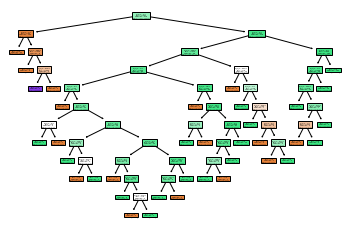

In [ ]:
tree.plot_tree(model, filled = True);

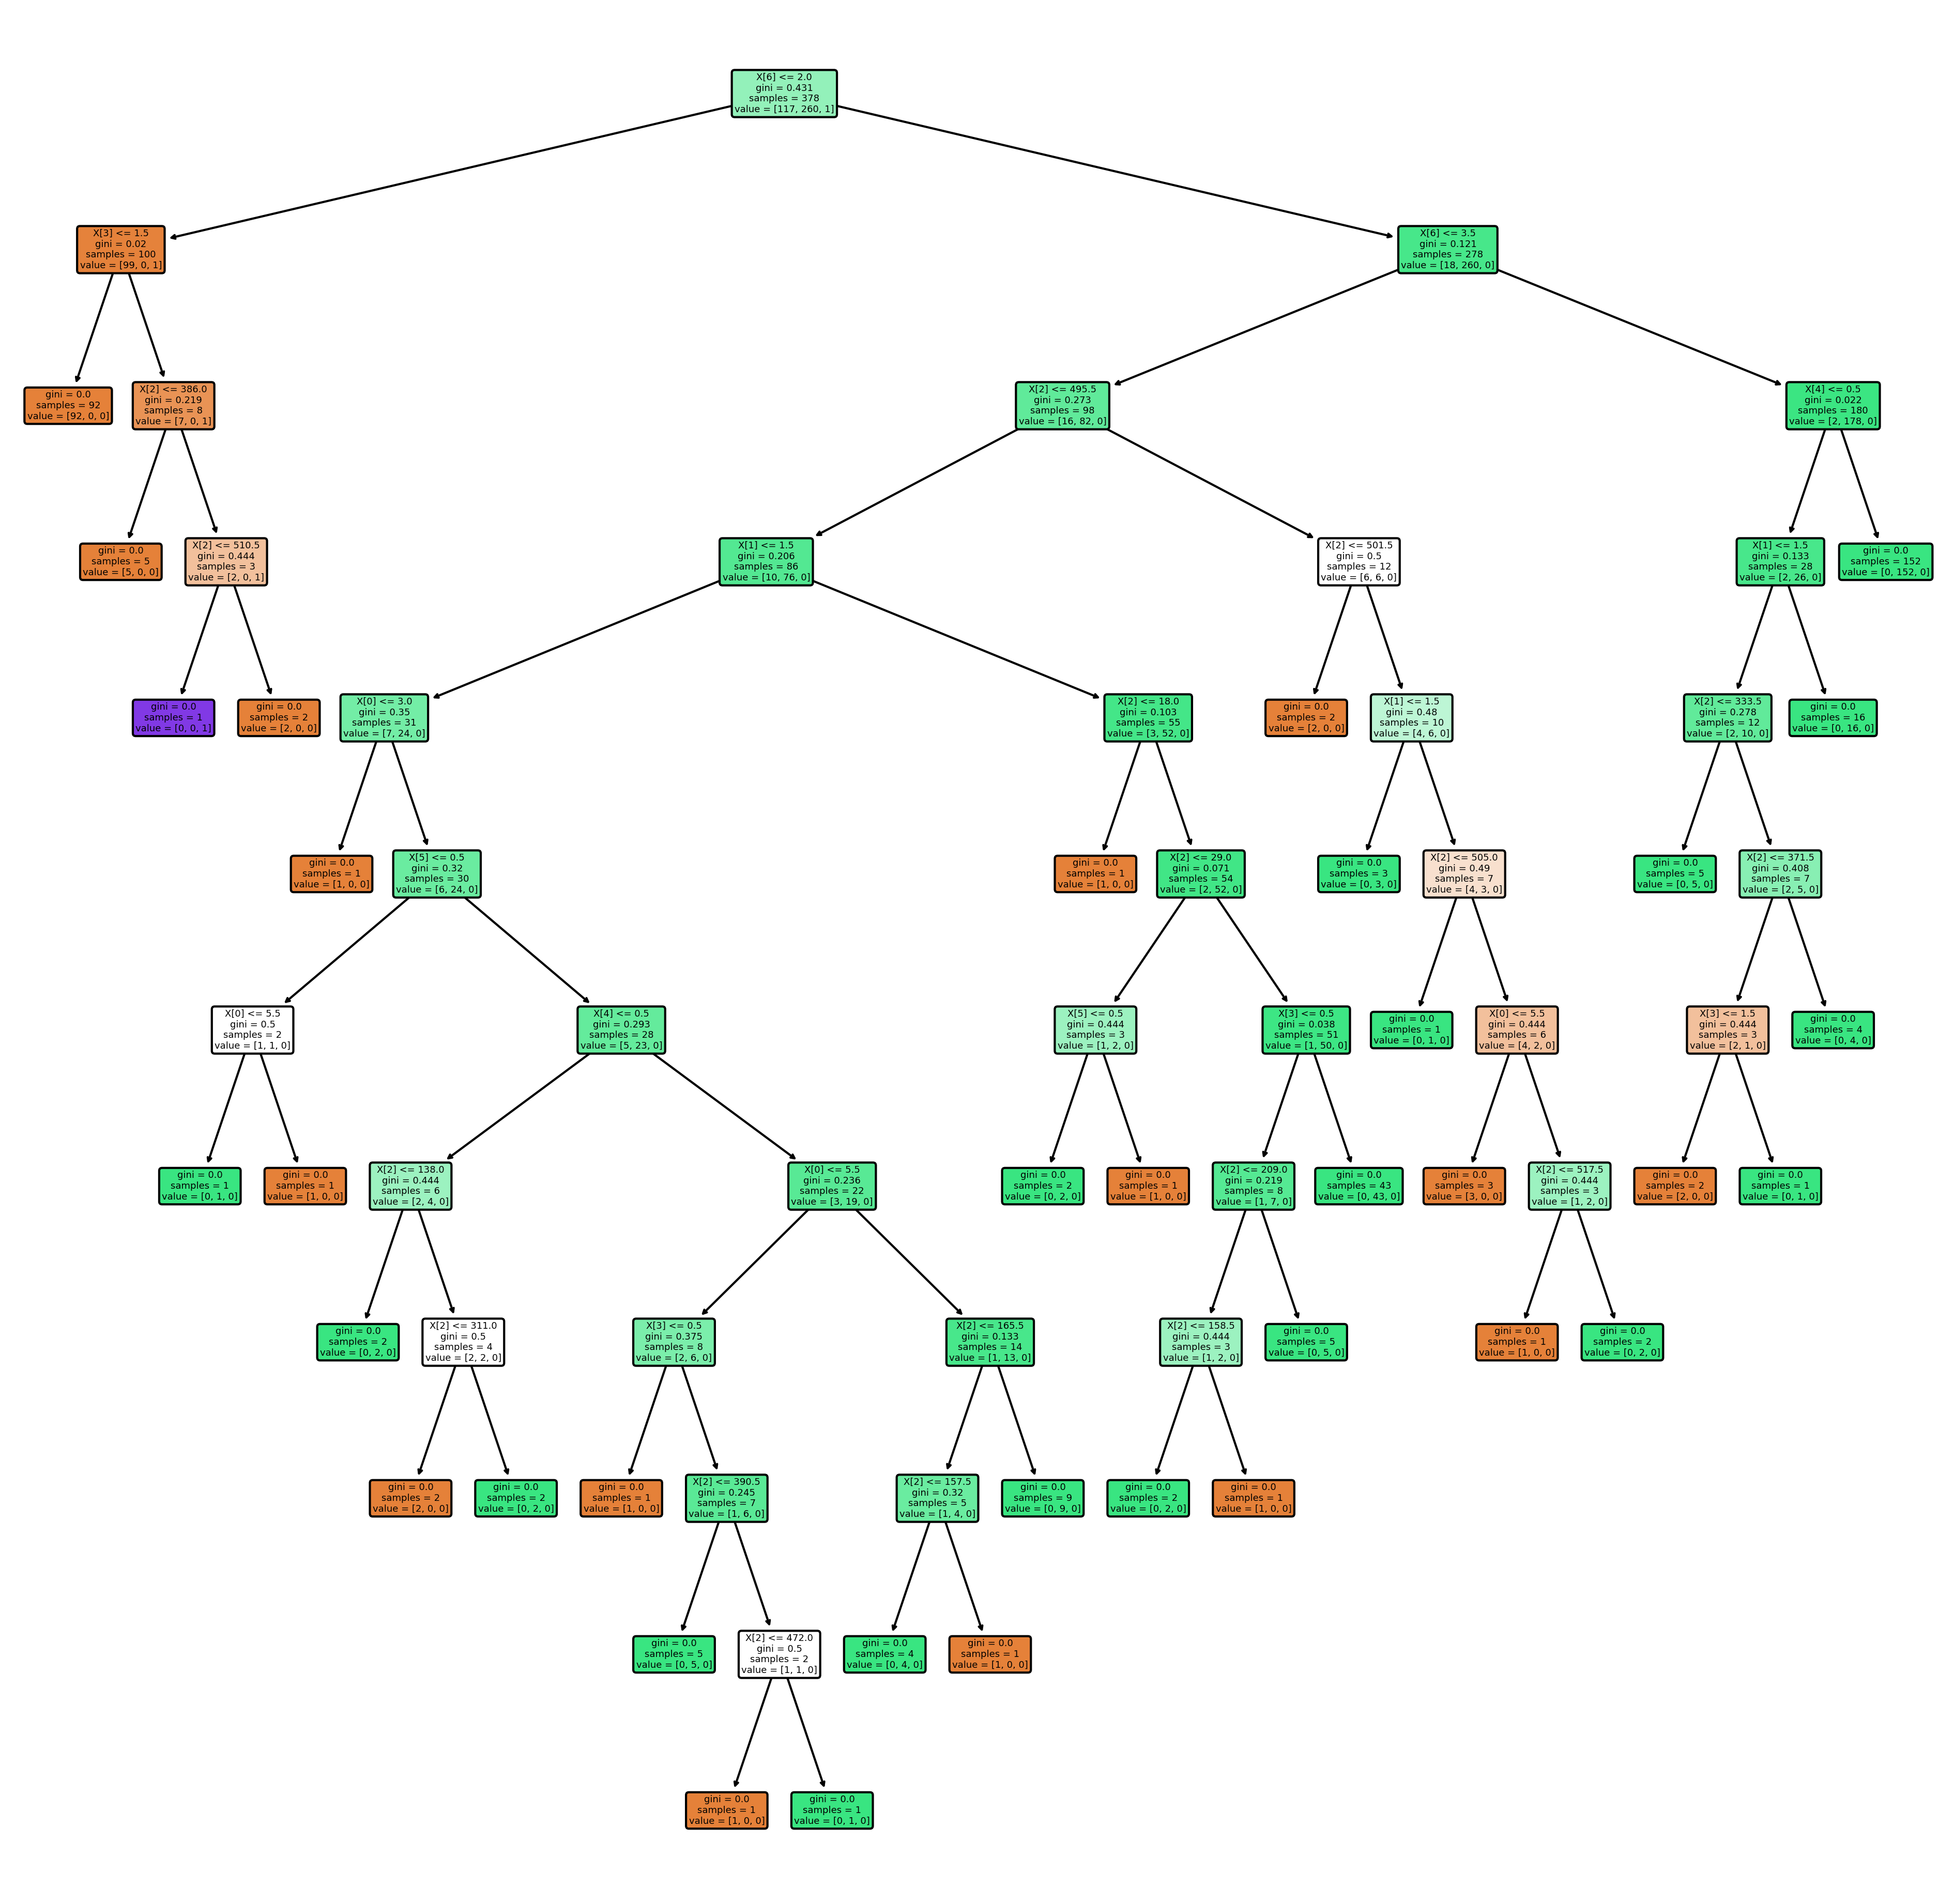

In [ ]:
#Lưu lại cây quyết định với hình ảnh mong muốn
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=300)
_=tree.plot_tree(model,filled=True,rounded=True, ax=axes)
plt.savefig('decision_tree.png')

5.2.2. Cây quyết định Random Forest 

In [ ]:
# Lựa chọn kỹ thuật học Random Forest (thêm các tham số nếu cần can thiệp sâu hơn)
modelRandomForest = RandomForestClassifier()

# Đưa dữ liệu vào huấn luyện mô hình
modelRandomForest.fit(X_train.values, y_train.values.ravel())

RandomForestClassifier()

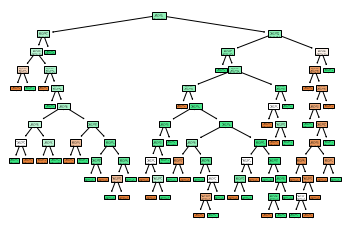

In [ ]:
# Hiển thị mô hình: ví dụ một cây trong rừng ngẫu nhiên
estimator = modelRandomForest.estimators_[1] # cây thứ 2 của rừng
plot_tree(estimator, filled = True)
plt.show()



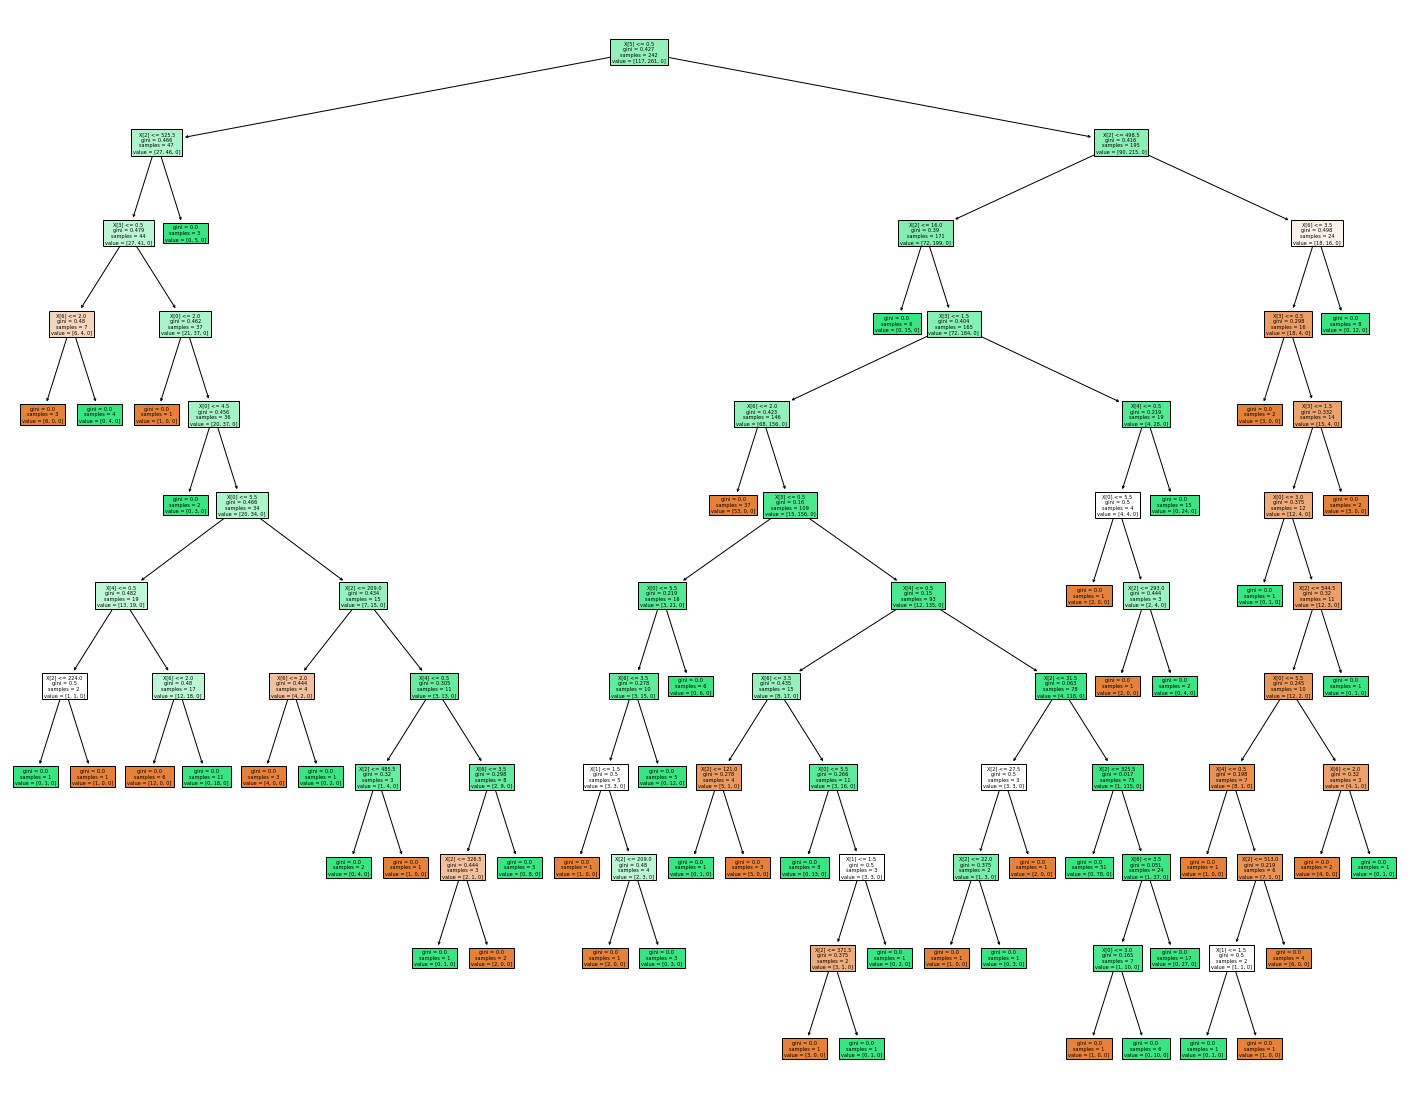

In [ ]:
# Lưu lại cây dưới dạng ảnh nếu muốn
figRandomForest = plt.figure(figsize = (25,20))
_= plot_tree(estimator, filled = True)
figRandomForest.savefig("random_Forest.png")

6. Kiểm tra mô hình và đánh giá độ chính xác của mô hình 

In [ ]:
# Kiểm thử mô hình trên tập test
y_pred_array = []
for i in range(1000):
  y_pred_array.append(model.predict(X_test.values)) 
y_pred = sum(y_pred_array) / len(y_pred_array)
print ("Độ chính xác khi sử dụng decision tree (Trung bình):", accuracy_score(y_test, y_pred) * 100)

# Kiểm thử mô hình trên tập test
y_pred_RandomForest_array = []
for i in range(1000):
  y_pred_RandomForest_array.append(modelRandomForest.predict(X_test.values)) 
y_pred_RandomForest = sum(y_pred_RandomForest_array) / len(y_pred_RandomForest_array)
print ("Độ chính xác khi sử dụng Random Forest (Trung bình):", accuracy_score(y_test, y_pred_RandomForest) * 100)


Độ chính xác khi sử dụng decision tree (Trung bình): 89.83957219251337
Độ chính xác khi sử dụng Random Forest (Trung bình): 93.04812834224599


6.1. Decision Tree

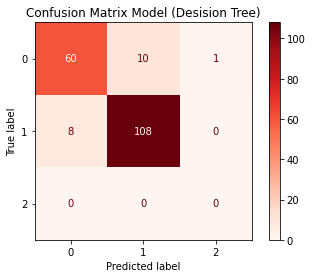

In [ ]:
#Xây dựng ma trận nhầm lẫn (Confusion Matrix)
predictions = model.predict(X_test.values)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
disp.ax_.set_title('Confusion Matrix Model (Desision Tree)')
plt.show()

6.2. Random Forest

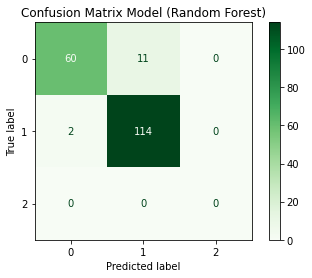

In [ ]:
#Xây dựng ma trận nhầm lẫn (Confusion Matrix)

predictionsRandomForest = modelRandomForest.predict(X_test.values)
cm = confusion_matrix(y_test, predictionsRandomForest, labels=modelRandomForest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=modelRandomForest.classes_)
disp.plot(cmap=plt.cm.Greens)
disp.ax_.set_title('Confusion Matrix Model (Random Forest)')
plt.show()

In [ ]:
#Random Forest
reprotRandomForest = classification_report(y_test, y_pred_RandomForest)
print(reprotRandomForest)

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        71
           1       0.91      0.98      0.95       116

    accuracy                           0.93       187
   macro avg       0.94      0.91      0.92       187
weighted avg       0.93      0.93      0.93       187



7.Sử dụng mô hình

7.1. Mô hình dự đoán sử dụng Decision True



In [ ]:
# Sử dụng mô hình dự đoán khả năng phạm tội phục vụ công tác khoanh vùng nghi phạm 
# HoTen 0, GioiTinh 2, Tuoi 5, BC_Ngoai_Pham 0, TienAn 1, Dong_Co 0, BC_Pham_Toi 0
x = [[60,2,5,0,1,0,0]]
y = model.predict(x)
if y == 0 :
    print("Nghi phạm không có khả năng phạm tội (Desision tree)") 
else:
    print("Nghi phạm có khả năng phạm tội (Desision tree)")

Nghi phạm không có khả năng phạm tội (Desision tree)


7.2. Sử dụng mô hình Random Forest

In [ ]:
# Sử dụng mô hình dự đoán khả năng phạm tội phục vụ công tác khoanh vùng nghi phạm 
# HoTen 0, GioiTinh 2, Tuoi 5, BC_Ngoai_Pham 0, TienAn 1, Dong_Co 0, BC_Pham_Toi 0
x = [[60,2,5,0,1,0,0]]
y = modelRandomForest.predict(x)
if y == 0:
    print("Nghi phạm không có khả năng phạm tội (Random Forest)")
else:
    print("Nghi phạm có khả năng phạm tội(Random Forest)")

Nghi phạm không có khả năng phạm tội (Random Forest)
